# Email Classifier as Spam or Ham

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,5)
import seaborn as sns

## Data Cleaning

In [2]:
df1 = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df1.shape

(5572, 5)

<Axes: xlabel='v1'>

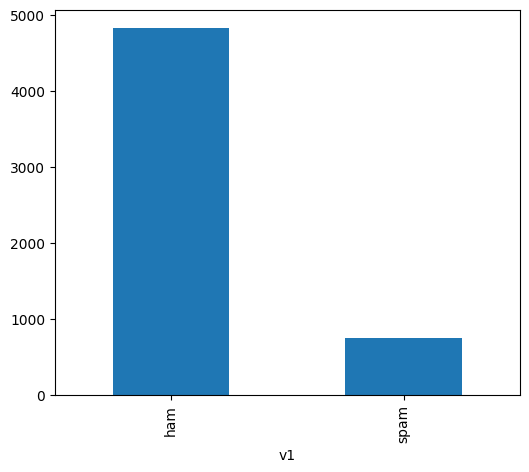

In [4]:
df1['v1'].value_counts().plot(kind='bar')  # Adjust the column name

In [5]:
df2 = df1.drop ( ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 'columns')
df2.sample(10)

,v1,v2
4673,ham,I'm leaving my house now.
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...
5568,ham,Will Ì_ b going to esplanade fr home?
1050,ham,Are you available for soiree on June 3rd?
4623,ham,Jus finish blowing my hair. U finish dinner al...
3667,ham,Thanks for loving me so. You rock
4501,ham,Wot is u up 2 then bitch?
1340,ham,Might ax well im there.
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...


In [6]:
df2.shape

(5572, 2)

In [7]:
df2.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df2['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df2.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df2.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'spam' as 1 and 'ham' as 0
df2['v1'] = label_encoder.fit_transform(df2['v1'])

# Now 'v1' will contain 1 for 'spam' and 0 for 'ham'

In [13]:
df2.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='v1'>

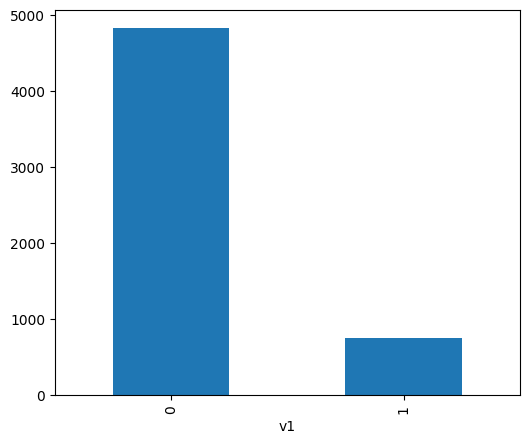

In [14]:
df2['v1'].value_counts().plot(kind='bar')  # Adjust the column name

## Text Preprocessing

In [15]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to the 'v2' column
df2['v2'] = df2['v2'].apply(preprocess_text)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)  # You can adjust the number of features

# Fit and transform the text data
X = vectorizer.fit_transform(df2['v2'])

# Convert to a DataFrame if needed
X = X.toarray()

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X.shape

(5572, 3000)

## Train-Test-Split

In [19]:
from sklearn.model_selection import train_test_split

# X contains the numerical features (TF-IDF transformed text), y contains the labels
y = df2['v1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 4457, dtype: int32

## Models Trying

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# Evaluate the model
score = lr_clf.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {score}')

Logistic Regression Accuracy: 0.9515695067264573


In [23]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

score = nb_clf.score(X_test, y_test)
print(f'Naive Bayes Accuracy: {score}')

Naive Bayes Accuracy: 0.9766816143497757


In [24]:
# from sklearn.ensemble import RandomForestClassifier

# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
# score = rf_clf.score(X_test, y_test)
# print(f'Random Forest Accuracy: {score}')

In [25]:
# from sklearn.svm import SVC

# svm_clf = SVC()
# svm_clf.fit(X_train, y_train)

# score = svm_clf.score(X_test, y_test)
# print(f'SVM Accuracy: {score}')

## K fold Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# for logistic regression
scores_lr = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_lr)

# Calculate the average accuracy across all folds
print("Average Accuracy for logistic regression:", np.mean(scores_lr))

Accuracy for each fold: [0.95179372 0.96748879 0.95735129 0.94051627 0.96071829]
Average Accuracy for logistic regression: 0.9555736739593241


In [28]:
# for Naive Bias
scores_nb = cross_val_score(nb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_nb)

# Calculate the average accuracy across all folds
print("Average Accuracy for naive bias:", np.mean(scores_nb))

Accuracy for each fold: [0.97982063 0.98318386 0.96520763 0.96857464 0.96969697]
Average Accuracy for naive bias: 0.9732967442235007


In [29]:
# Taking a lot of time to run
# for Random Forset

# scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# print("Random Forest Accuracy for each fold:", scores_rf)
# print("Average Random Forest Accuracy:", np.mean(scores_rf))

In [30]:
# Taking a lot of time to run
# for SVM
# scores_svm = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')

# print("SVM Accuracy for each fold:", scores_svm)
# print("Average SVM Accuracy:", np.mean(scores_svm))

## Confustion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
# Get predictions from logistic regression model
y_pred1 = lr_clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[961   4]
 [ 50 100]]


In [33]:
# Get predictions from naive bias model
y_pred2 = nb_clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[965   0]
 [ 26 124]]


## Classification Report

In [34]:
from sklearn.metrics import classification_report,accuracy_score

In [35]:
# Get the classification report for logistic regression
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [36]:
# Get the classification report for naive bias
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Finding best parameters for hyperparamter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2','elasticnet']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python312\site-packa

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [39]:
# for Naive Bias
param_grid = {'alpha': [0.01, 0.1, 1, 10], 'force_alpha': [True, False]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)

Best parameters:  {'alpha': 0.1, 'force_alpha': True}


In [40]:
## for random forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [6, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# grid_rf.fit(X_train, y_train)

# print("Best parameters for Random Forest: ", grid_rf.best_params_)

## Hyperparameter tuning

### Train Logistic Regression with the best parameters

In [41]:
lr_clf_tuned = LogisticRegression(C=10, penalty='l2', solver='lbfgs')  # 'liblinear' supports l2 penalty

lr_clf_tuned.fit(X_train, y_train)

LogisticRegression(C=10)

In [42]:
# Test the model on the test set
y_pred_tuned1 = lr_clf_tuned.predict(X_test)

# Evaluate performance
print("Accuracy for tuned logistic regression:", accuracy_score(y_test, y_pred_tuned1))
print(classification_report(y_test, y_pred_tuned1))

Accuracy for tuned logistic regression: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_clf_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("Average Accuracy after tuning:", scores.mean())

Average Accuracy after tuning: 0.9793565953506163


### Train Naive Bias with the best parameteres

In [44]:
nb_clf_tuned = MultinomialNB(alpha=0.1, force_alpha = True)

nb_clf_tuned.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [45]:
# Test the model on the test set
y_pred_tuned2 = nb_clf_tuned.predict(X_test)

# Evaluate performance
print("Accuracy for tuned Naive Bias:", accuracy_score(y_test, y_pred_tuned2))
print(classification_report(y_test, y_pred_tuned2))

Accuracy for tuned Naive Bias: 0.9838565022421525
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb_clf_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("Average Accuracy after tuning:", scores.mean())

Average Accuracy after tuning: 0.9836207113486635


### Train Random Forest with the best parameters

In [47]:
# rf_clf_tuned = RandomForestClassifier(criterion='gini', max_depth=12)

# rf_clf_tuned.fit(X_train, y_train)

In [48]:
# # Test the model on the test set
# y_pred_tuned = rf_clf_tuned.predict(X_test)

# # Evaluate performance
# from sklearn.metrics import classification_report, accuracy_score
# print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
# print(classification_report(y_test, y_pred_tuned))

In [49]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(rf_clf_tuned, X_train, y_train, cv=5, scoring='accuracy')
# print("Average Accuracy after tuning:", scores.mean())

## Testing for new data

In [50]:
# Simulate new data (replace this with real new data or create test cases)
new_emails = [
    "Congratulations, you've won a free ticket! Click here to claim your prize.",  # Likely spam
    "Can we meet tomorrow to discuss the project details?",  # Likely ham
]

# Preprocess new data (same steps as in the training pipeline)
# Assuming tfidf_vectorizer was already fitted on the training data
new_emails_tfidf = vectorizer.transform(new_emails)

# Predict using the trained model (Logistic Regression)
new_predictions = lr_clf_tuned.predict(new_emails_tfidf)

# Output the predictions
for i, email in enumerate(new_emails):
    print(f"Email: {email}")
    print(f"Prediction: {'Spam' if new_predictions[i] == 1 else 'Ham'}\n")

Email: Congratulations, you've won a free ticket! Click here to claim your prize.
Prediction: Spam

Email: Can we meet tomorrow to discuss the project details?
Prediction: Ham



## Save the model and load for fututre use

In [51]:
import pickle

In [52]:
# Save the logistic regression model
with open('logistic_regression_spam_model.pkl', 'wb') as model_file:
    pickle.dump(lr_clf_tuned, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)